In [1]:
import json
import numpy as np
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

In [2]:
# GLOBAL PARAMETERS

shift_range = 50 # for now, we shift all peaks independently
variation_range = 0.05 # +/- of absolute height for each peak
kernel_range = (2, 5) # min and max for guassian kernel sizes

In [3]:
# less variation for test data
test_shift = 30 
test_var = 0.03

In [4]:
# PARAMETERS
n_datapoints = 5000
boundary = 100
n_classes = 9
min_peaks = 2
max_peaks = 10
max_height = 100

config = {
    'datapoints' : n_datapoints,
    'boundary' : boundary,
    'classes' : n_classes,
    'min_peaks' : min_peaks,
    'max_peaks' : max_peaks,
    'max_height' : max_height
}

In [5]:
# minor peaks
spectra = {
    # triplet 1
    0 : {"peak_positions" : [700, 3000], "peak_heights" : [0.7, 1.0]},
    1 : {"peak_positions" : [700, 1800, 3000], "peak_heights" : [0.7, 0.045, 1.0]},
    2 : {"peak_positions" : [700, 3000, 4200], "peak_heights" : [0.7, 1.0, 0.045]},
    # triplet 2
    3 : {"peak_positions" : [920, 1115], "peak_heights" : [1.0, 0.4]},
    4 : {"peak_positions" : [923, 1112, 1500], "peak_heights" : [1.0, 0.4, 0.045]},
    5 : {"peak_positions" : [918, 1116, 1630], "peak_heights" : [1.0, 0.4, 0.045]},
    # triplet 3
    6 : {"peak_positions" : [500, 2100], "peak_heights" : [0.9, 1.0]},
    7 : {"peak_positions" : [500, 2100, 2260], "peak_heights" : [0.9, 1.0, 0.045]},
    8 : {"peak_positions" : [500, 2100, 2260, 2750], "peak_heights" : [0.9, 1.0, 0.045, 0.045]},
}

config['spectra'] = spectra
with open('test.json', 'w') as file:
    json.dump(config, file)

In [6]:
# position overlap
spectra = {
    # triplet 1
    0 : {"peak_positions" : [700, 3000], "peak_heights" : [1.0, 0.7]},
    1 : {"peak_positions" : [700, 3070], "peak_heights" : [1.0, 0.7]},
    2 : {"peak_positions" : [700, 3140], "peak_heights" : [1.0, 0.7]},
    # triplet 2
    3 : {"peak_positions" : [1230, 2103], "peak_heights" : [0.15, 1.0]},
    4 : {"peak_positions" : [1300, 2101], "peak_heights" : [0.15, 1.0]},
    5 : {"peak_positions" : [1370, 2098], "peak_heights" : [0.15, 1.0]},
    # triplet 3
    6 : {"peak_positions" : [1230, 1750, 4700], "peak_heights" : [0.15, 0.2, 1.0]},
    7 : {"peak_positions" : [1300, 1820, 4700], "peak_heights" : [0.15, 0.2, 1.0]},
    8 : {"peak_positions" : [1370, 1890, 4700], "peak_heights" : [0.15, 0.2, 1.0]},
}

config['spectra'] = spectra
with open('test.json', 'w') as file:
    json.dump(config, file)

In [7]:
xt = np.load('./x_train.npy')
xtest = np.load('./x_test.npy')

xt /= np.max(xt, axis=1, keepdims=True)
xtest /= np.max(xtest, axis=1, keepdims=True)

In [8]:
pos_train = np.argmax(xt[:,1000:], axis=1)
hi_train = np.max(xt[:,1000:], axis=1)

pos_test = np.argmax(xtest[:,1000:], axis=1)
hi_test = np.max(xtest[:,1000:], axis=1)

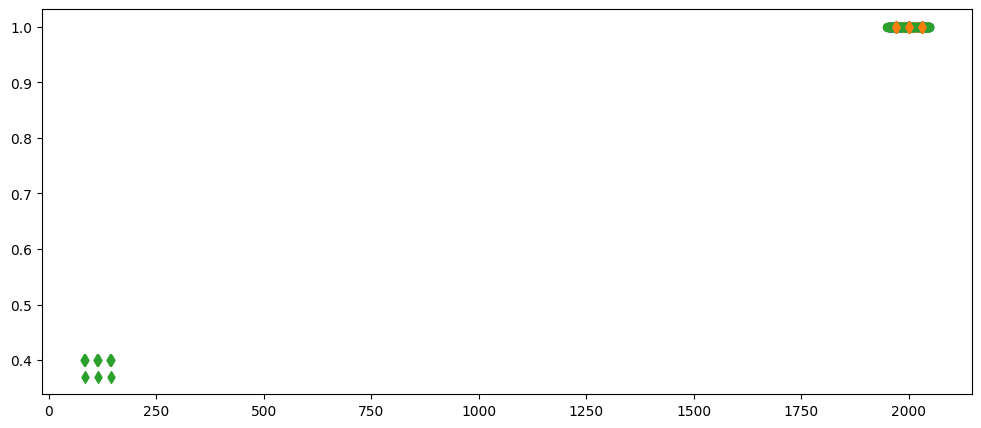

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(pos_train[:50], hi_train[:50])
plt.scatter(pos_train[50:100], hi_train[50:100])
plt.scatter(pos_train[100:150], hi_train[100:150])
plt.scatter(pos_test[:9], hi_test[:9], marker='d', c='C0')
plt.scatter(pos_test[9:18], hi_test[9:18], marker='d', c='C1')
plt.scatter(pos_test[18:27], hi_test[18:27], marker='d', c='C2')
plt.show()

In [10]:
# intensity overlap
spectra = {
    # triplet 1
    0 : {"peak_positions" : [920, 1500], "peak_heights" : [0.08, 1.0]},
    1 : {"peak_positions" : [920, 1500], "peak_heights" : [0.155, 1.0]},
    2 : {"peak_positions" : [920, 1500], "peak_heights" : [0.23, 1.0]},
    # triplet 2
    3 : {"peak_positions" : [1147, 2261], "peak_heights" : [1.0, 0.20]},
    4 : {"peak_positions" : [1151, 2258], "peak_heights" : [1.0, 0.275]},
    5 : {"peak_positions" : [1153, 2262], "peak_heights" : [1.0, 0.35]},
    # triplet 3
    6 : {"peak_positions" : [302, 2750, 4198], "peak_heights" : [0.08, 1.0, 0.22]},
    7 : {"peak_positions" : [300, 2750, 4200], "peak_heights" : [0.155, 1.0, 0.21]},
    8 : {"peak_positions" : [299, 2750, 4202], "peak_heights" : [0.23, 1.0, 0.23]},
}

In [11]:
# combination
config["classes"] = 27
spectra = {
    # triplet 1
    0 : {"peak_positions" : [700, 3000], "peak_heights" : [0.7, 1.0]},
    1 : {"peak_positions" : [700, 1800, 3000], "peak_heights" : [0.7, 0.035, 1.0]},
    2 : {"peak_positions" : [700, 3000, 4200], "peak_heights" : [0.7, 1.0, 0.035]},
    # triplet 2
    3 : {"peak_positions" : [920, 1115], "peak_heights" : [1.0, 0.4]},
    4 : {"peak_positions" : [923, 1112, 1500], "peak_heights" : [1.0, 0.4, 0.035]},
    5 : {"peak_positions" : [918, 1116, 1630], "peak_heights" : [1.0, 0.4, 0.035]},
    # triplet 3
    6 : {"peak_positions" : [500, 2100], "peak_heights" : [0.9, 1.0]},
    7 : {"peak_positions" : [500, 2100, 2260], "peak_heights" : [0.9, 1.0, 0.035]},
    8 : {"peak_positions" : [500, 2100, 2260, 2750], "peak_heights" : [0.9, 1.0, 0.035, 0.035]},
    # triplet 4
    9 : {"peak_positions" : [700, 3000], "peak_heights" : [1.0, 0.7]},
    10 : {"peak_positions" : [700, 3070], "peak_heights" : [1.0, 0.7]},
    11 : {"peak_positions" : [700, 3140], "peak_heights" : [1.0, 0.7]},
    # triplet 5
    12 : {"peak_positions" : [1230, 2103], "peak_heights" : [0.15, 1.0]},
    13 : {"peak_positions" : [1300, 2101], "peak_heights" : [0.15, 1.0]},
    14 : {"peak_positions" : [1370, 2098], "peak_heights" : [0.15, 1.0]},
    # triplet 6
    15 : {"peak_positions" : [1230, 1750, 4700], "peak_heights" : [0.15, 0.2, 1.0]},
    16 : {"peak_positions" : [1300, 1820, 4700], "peak_heights" : [0.15, 0.2, 1.0]},
    17 : {"peak_positions" : [1370, 1890, 4700], "peak_heights" : [0.15, 0.2, 1.0]},
    # triplet 7
    18 : {"peak_positions" : [920, 1500], "peak_heights" : [0.08, 1.0]},
    19 : {"peak_positions" : [920, 1500], "peak_heights" : [0.155, 1.0]},
    20 : {"peak_positions" : [920, 1500], "peak_heights" : [0.23, 1.0]},
    # triplet 8
    21 : {"peak_positions" : [1147, 2261], "peak_heights" : [1.0, 0.20]},
    22 : {"peak_positions" : [1151, 2258], "peak_heights" : [1.0, 0.275]},
    23 : {"peak_positions" : [1153, 2262], "peak_heights" : [1.0, 0.35]},
    # triplet 9
    24 : {"peak_positions" : [302, 2750, 4198], "peak_heights" : [0.08, 1.0, 0.22]},
    25 : {"peak_positions" : [300, 2750, 4200], "peak_heights" : [0.155, 1.0, 0.21]},
    26 : {"peak_positions" : [299, 2750, 4202], "peak_heights" : [0.23, 1.0, 0.23]},
}

config['spectra'] = spectra
with open('challenge.json', 'w') as file:
    json.dump(config, file)